<a href="https://colab.research.google.com/github/s-im-ran/Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction Using Machine Learning Algorithms: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier**

In [ ]:
#IMPORTING THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data is taken from the Cleveland Database.The "goal" field refers to the presence of heart disease in the patient.  
It is integer valued from 0 (no presence) to 4.


In [ ]:
!pip install ucimlrepo

IMPORTING THE DATASET

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
# variable information
print(heart_disease.variables)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Checking the missing values
missing_x_values=X.isnull().sum()
missing_y_values=y.isnull().sum()
print(missing_x_values)
print(missing_y_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
num    0
dtype: int64


Replacing the missing inputs with the mean values

In [ ]:
X.fillna(X.mean(),inplace=True)

<ipython-input-10-927cea2a86ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)


In [ ]:
#Checking the missing values
missing_x_values=X.isnull().sum()
missing_y_values=y.isnull().sum()
print(missing_x_values)
print(missing_y_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
num    0
dtype: int64


In [ ]:
y.shape

(303, 1)

In [ ]:
X.shape

(303, 13)

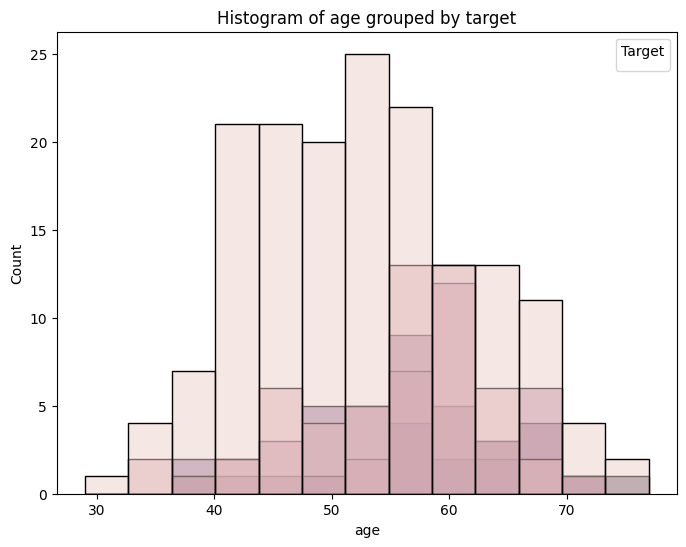

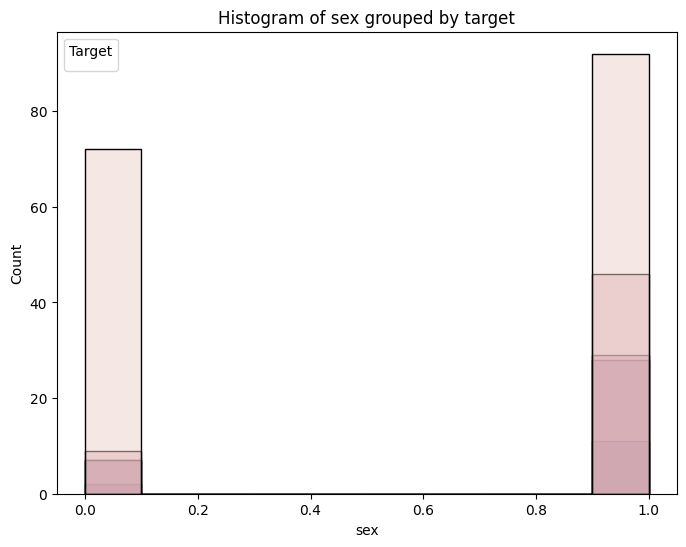

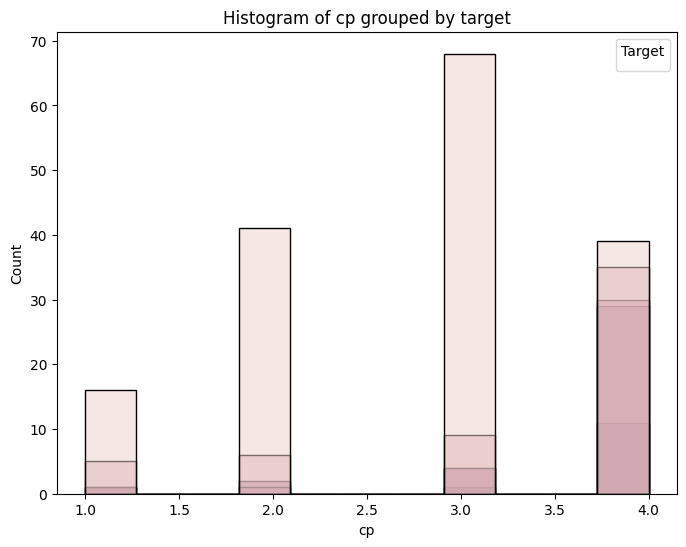

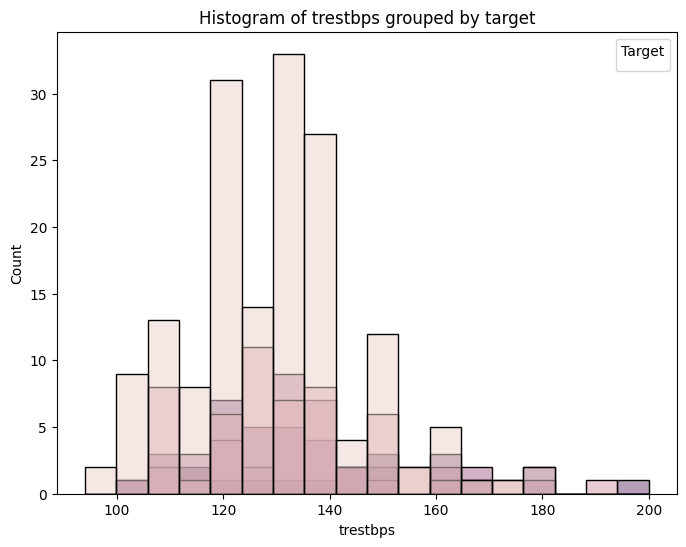

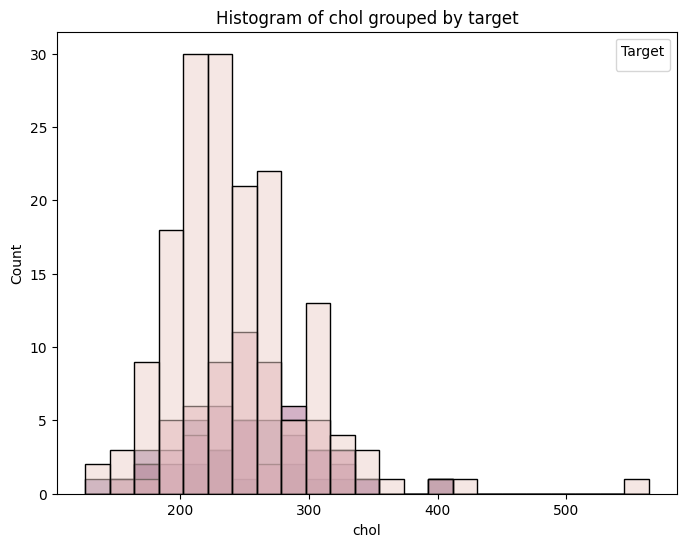

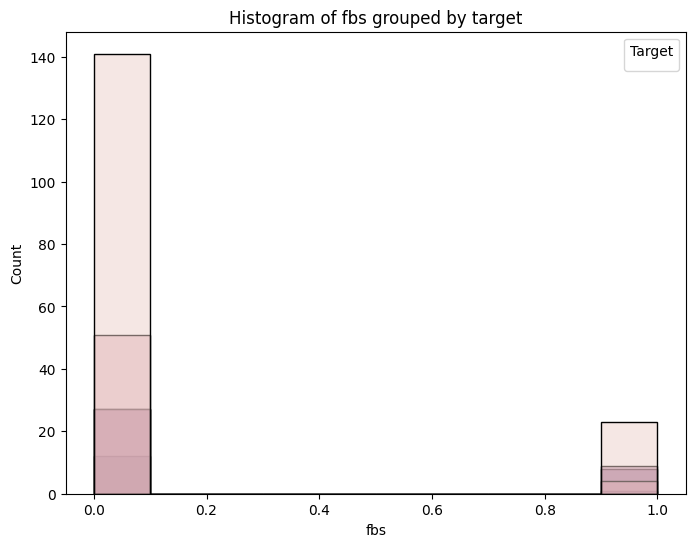

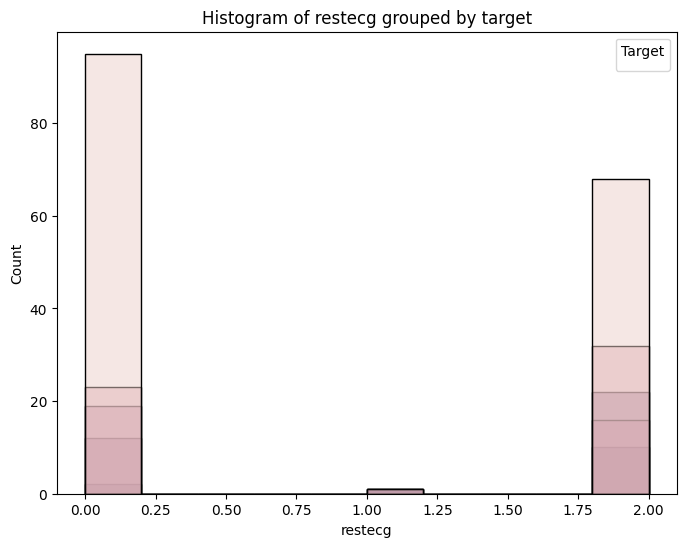

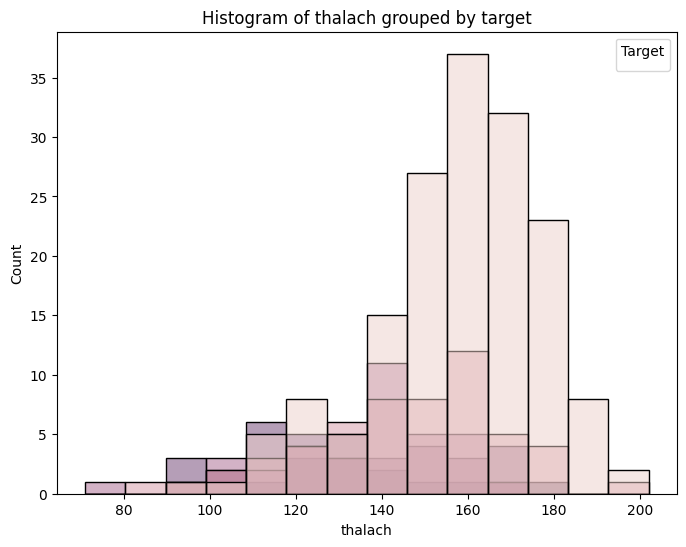

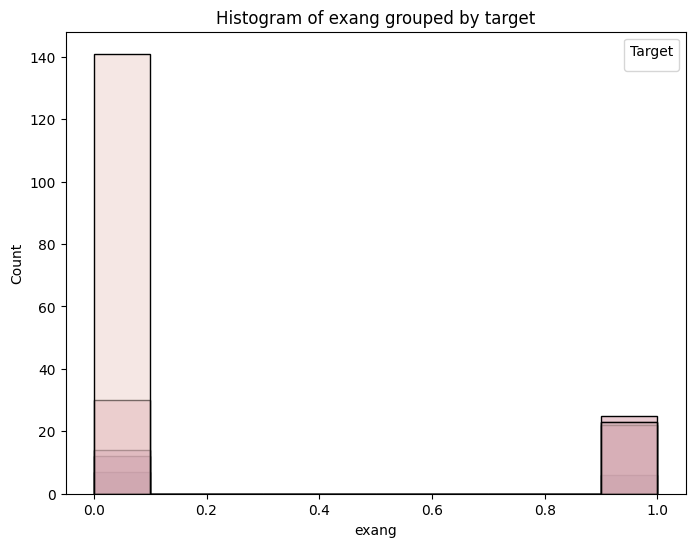

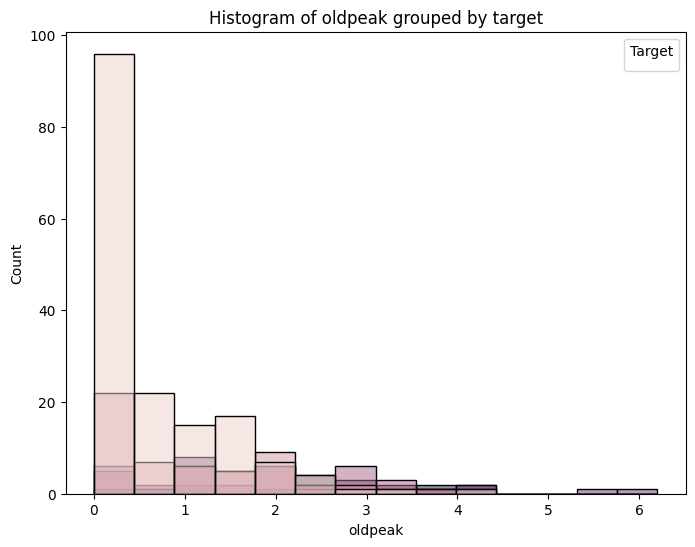

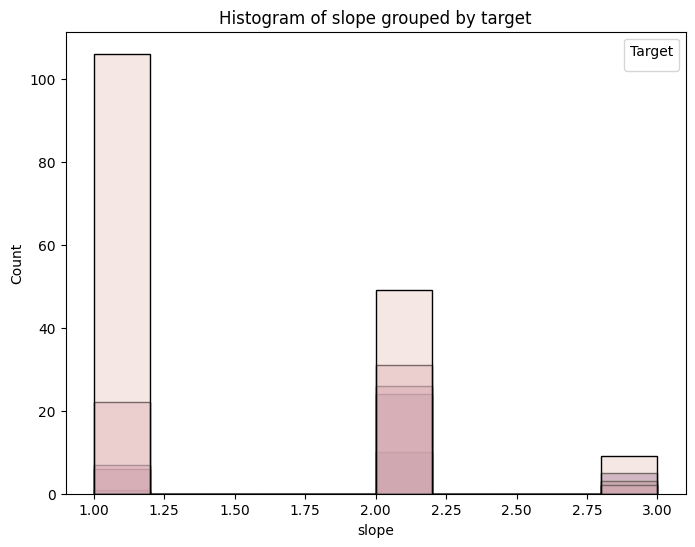

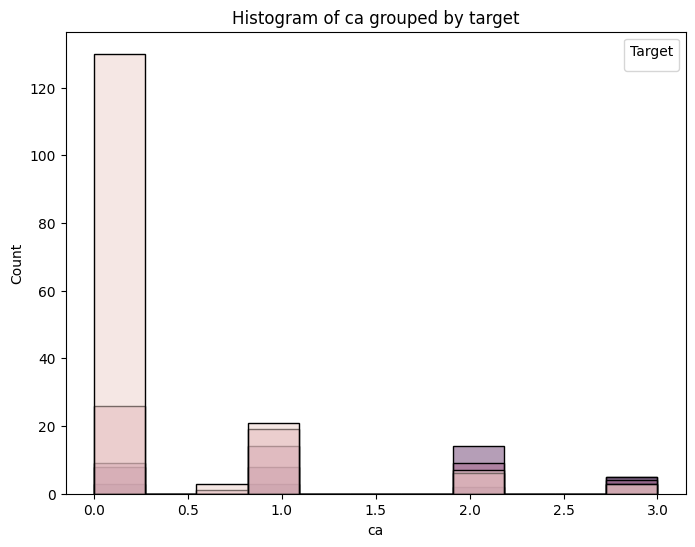

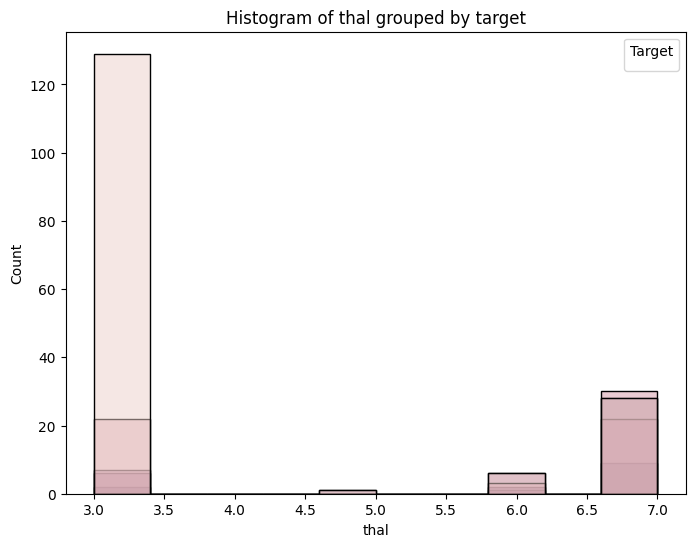

In [ ]:
df = pd.DataFrame(X, columns=heart_disease.feature_names)
df['target'] = y

for feature in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='target')
    plt.title(f'Histogram of {feature} grouped by target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.show()



In [ ]:
#For Binary Classification converting all the values greater than zero to 1
y[y > 0] = 1

<ipython-input-15-fe519c2647f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1
<ipython-input-15-fe519c2647f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1


In [ ]:
y.head()

,num
0,0
1,1
2,1
3,0
4,0


In [ ]:
y = np.ravel(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.66666667, ..., 0.33333333, 1.        ,
        0.        ],
       [0.83333333, 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.625     , 1.        , 1.        , ..., 0.33333333, 1.        ,
        0.5       ],
       [0.66666667, 1.        , 1.        , ..., 0.33333333, 1.        ,
        0.25      ],
       [0.58333333, 0.        , 1.        , ..., 0.33333333, 0.        ,
        0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

best_accuracy = 0
best_model_name = ""
metrics_df = pd.DataFrame(columns=['Precision', 'Recall', 'Accuracy'])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    metrics_df.loc[name] = [precision, recall, accuracy]






In [ ]:
print("\nEvaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
                        Precision   Recall  Accuracy
Logistic Regression      1.000000  1.00000  1.000000
Decision Tree            1.000000  1.00000  1.000000
Random Forest            1.000000  1.00000  1.000000
K-Nearest Neighbors      0.730769  0.59375  0.672131
Support Vector Machine   0.833333  0.46875  0.672131
Naive Bayes              0.969697  1.00000  0.983607


In [ ]:
best_model_name = metrics_df['Accuracy'].idxmax()
best_accuracy = metrics_df.loc[best_model_name, 'Accuracy']
print(f'Best Model based on Accuracy: {best_model_name} (Accuracy = {best_accuracy:.4f})')



Best Model based on Accuracy: Logistic Regression (Accuracy = 1.0000)
